In [3]:
import pybroker
from datetime import datetime
from pybroker import Strategy, StrategyConfig
from pybroker.data import Alpaca
from alpaca_custom.alpaca_test import collect_creds
from strategy import MLTrader

In [4]:
# Initialize Alpaca data provider
creds = collect_creds()
alpaca = Alpaca(api_key=creds["API_KEY"], api_secret=creds["API_SECRET"])
pybroker.enable_data_source_cache('aapl')
config = StrategyConfig(initial_cash=100_000)
start_date = datetime.strptime('2022-03-01', '%Y-%m-%d')
end_date = datetime.strptime('2022-03-31', '%Y-%m-%d')
strategy = Strategy(alpaca, start_date, end_date, config=config)
trader = MLTrader()

In [5]:
strategy.add_execution(trader.buy_low, ['AAPL'])
result = strategy.backtest(timeframe="1d")

Backtesting: 2022-03-01 00:00:00 to 2022-03-31 00:00:00

Loaded cached bar data.

Test split: 2022-03-01 05:00:00 to 2022-03-30 04:00:00


  0% (0 of 22) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (22 of 22) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



Finished backtest: 0:00:01


In [6]:
result

TestResult(start_date=datetime.datetime(2022, 3, 1, 0, 0), end_date=datetime.datetime(2022, 3, 31, 0, 0), portfolio=                          cash     equity  margin  market_value      pnl  \
date                                                                       
2022-03-01 05:00:00  100000.00  100000.00     0.0     100000.00     0.00   
2022-03-02 05:00:00  100000.00  100000.00     0.0     100000.00     0.00   
2022-03-03 05:00:00  100000.00  100000.00     0.0     100000.00     0.00   
2022-03-04 05:00:00  100000.00  100000.00     0.0     100000.00     0.00   
2022-03-07 05:00:00   75209.41   99582.31     0.0      99582.31  -417.69   
2022-03-08 05:00:00   75209.41   99297.73     0.0      99297.73  -702.27   
2022-03-09 05:00:00   75209.41  100140.76     0.0     100140.76   140.76   
2022-03-10 05:00:00   99410.95   99410.95     0.0      99410.95  -589.05   
2022-03-11 05:00:00   74936.11   99073.99     0.0      99073.99  -926.01   
2022-03-14 04:00:00   74936.11   98432.83     0.

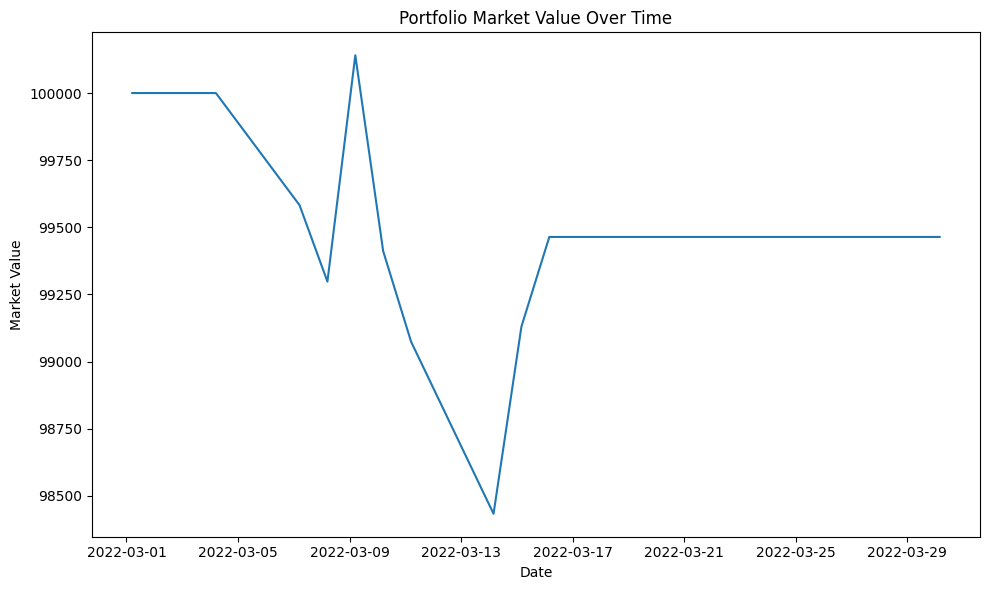

In [9]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
chart = plt.subplot2grid((1, 1), (0, 0))
chart.plot(result.portfolio.index, result.portfolio['market_value'])
plt.xlabel('Date')
plt.ylabel('Market Value')
plt.title('Portfolio Market Value Over Time')
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()